# Logistic Regression Project 
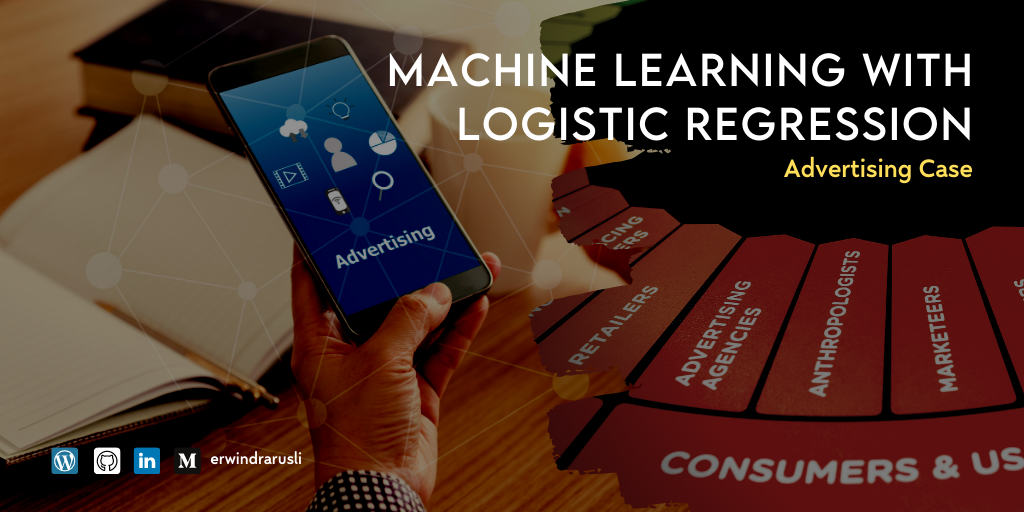

In this project I will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.<br>
**Data source: Purwadhika School**

## Import Libraries
Import the necessary libraries. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import pearsonr

## Get the Data
I will work with the advertising csv file from the client, and put it to the dataframe called ad_data.
This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [2]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Use info and describe() on ad_data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


**This dataset is clean, so we can continue to EDA.**

## Exploratory Data Analysis

Let's explore the data!

In [4]:
from scipy.stats import pearsonr #I use this additional libraries to show the correlation value on the plot.
sns.set(style="darkgrid", color_codes=True)

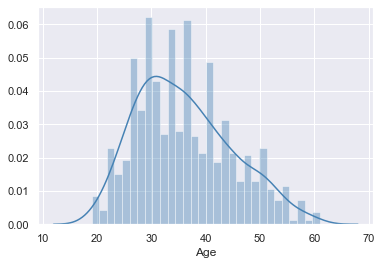

In [5]:
sns.distplot(ad_data['Age'], kde=True, bins=30, color='steelblue')

**I create a seaborn distplot of the <font color="royalblue">Age</font> column to see the distribution of customer's age.** <br> 
We can see that the most of customer is on 30 years age.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


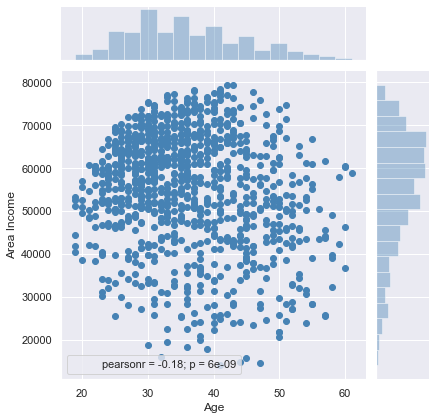

In [6]:
sns.jointplot(x='Age',y='Area Income',data=ad_data, color='steelblue').annotate(pearsonr)

**I create a jointplot to show the relation between <font color="royalblue">Area Income</font> and <font color="royalblue">Age</font>.** <br> It seems that these two features has no a good correlation.

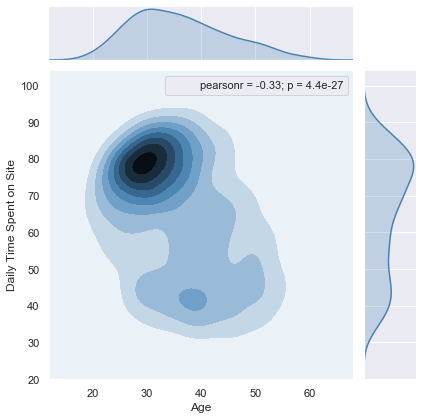

In [40]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data, kind='kde', color='steelblue').annotate(pearsonr)

**Then I create a jointplot to show the KDE distributions of <font color="royalblue">Daily Time spent on site </font> vs. <font color="royalblue">Age</font>.** <br>
Based on this plot, we can see that the majority customers spends about 80 minutes App per day.

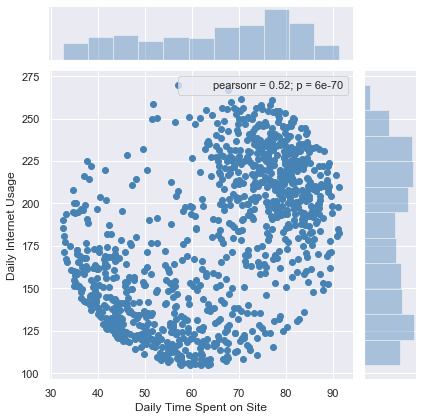

In [41]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data, color='steelblue').annotate(pearsonr)

**I create a jointplot of <font color="royalblue">Daily Time spent on site</font> vs. <font color="royalblue">Daily Internet Usage</font>**

In [49]:
# sns.pairplot(ad_data, diag_kind = "kde", hue='Clicked on Ad')

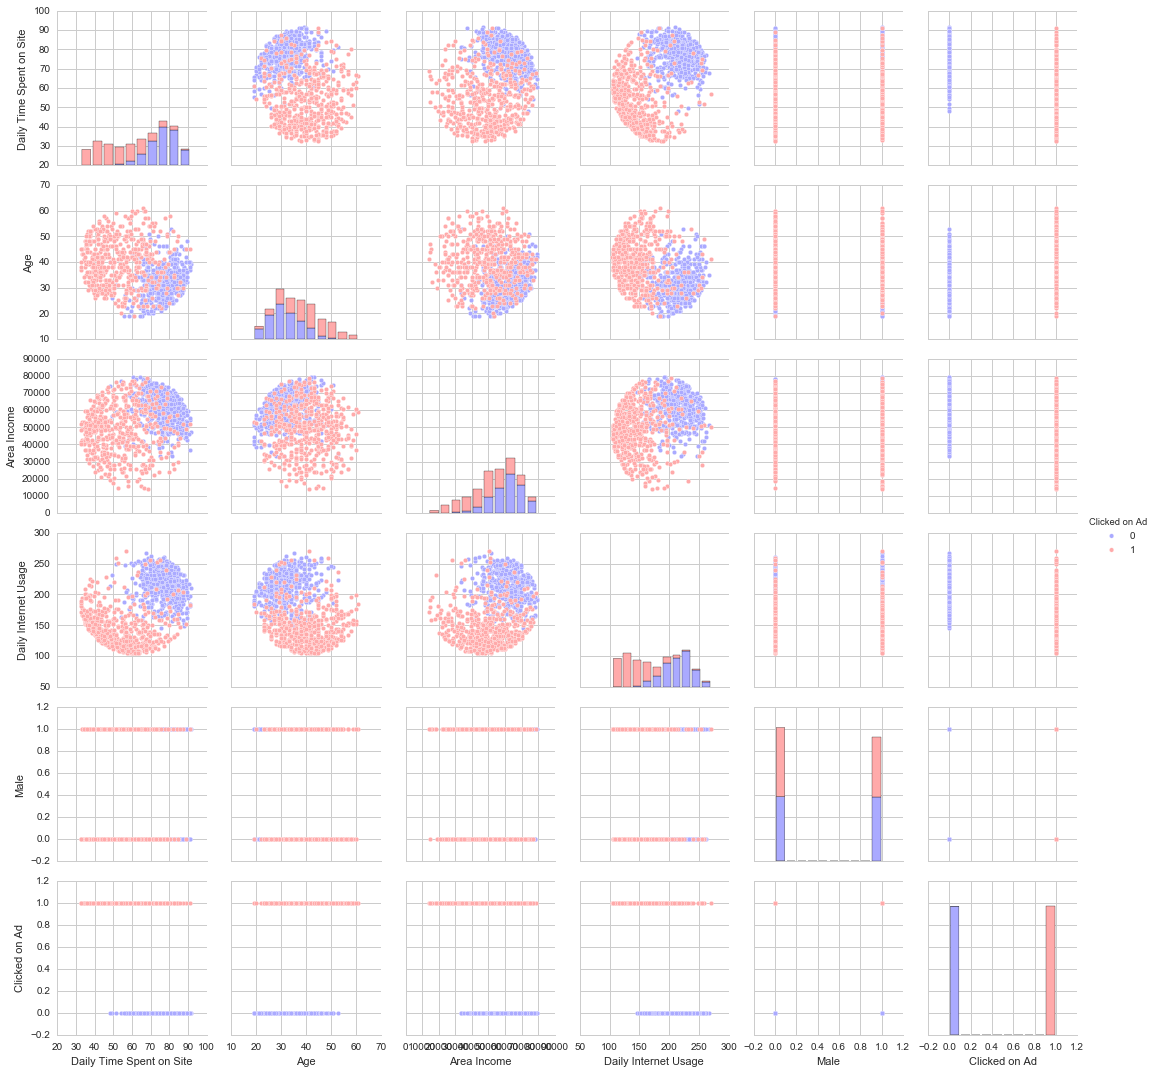

**Finally, I create a pairplot with the hue defined by the <font color="royalblue">Clicked on Ad</font> column feature.**

> **

## Training and Testing Data

Now that I've explored the data a bit, I need to to make a prediction to find out whether or not they will click on an ad. Let's start with split the data into training and testing sets.<br>



In [28]:
from sklearn.model_selection import train_test_split

**I set a variable "X" equal to the numerical features of the customers and a variable "Y" equal to the Clicked on Ad column.**

In [39]:
X= df.select_dtypes(exclude='object').drop('Clicked on Ad', axis=1)
Y =df['Clicked on Ad']

**I use model_selection.train_test_split from sklearn library to split the data into training and testing sets.<br>
I set test_size=0.3 and random_state=101. It means I split the existing dataset into 70% for data training, and 30% for data test**

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [35]:
Y.value_counts() #case balance problem, orang yg ngeklik dan tidak sama jumlahnya

1    500
0    500
Name: Clicked on Ad, dtype: int64

## Training the Model
Now it's time to train our model on our training data!<br>

**I need to import LogisticRegression from sklearn.linear_model library.**

In [36]:
from sklearn.linear_model import LogisticRegression

**Then, create an instance of a LogisticRegression() model named lm.**

In [37]:
lm = LogisticRegression()

**Train/fit lm on the training data.**

In [41]:
lm.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
**Now predict values for the testing data.**

In [43]:
predictions = lm.predict(X_test)

**To see the precision and recall value of the prediction, I create a classification report for the model using the sklearn.metrics library..**

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



**At this part, we've already done to make the prediction. But, let's try to count the probability of the ads will be clicked or not.**

In [60]:
predictions_proba = lm.predict_proba(X_test)

In [62]:
clicked_proba = predictions_proba[:,1]

In [66]:
tmp['proba'] = clicked_proba

In [84]:
threshold = 0.5 
tmp['pred_0.5'] = tmp['proba'].apply(lambda x: 1 if x >= threshold else 0 )

**Let's count the differences result between the true value and the predictions with the variant threshold.**

In [78]:
tmp[tmp.Y_test != tmp['pred_0.1']].shape 

(63, 9)

In [79]:
tmp[tmp.Y_test != tmp['pred_0.2']].shape

(31, 9)

In [81]:
tmp[tmp.Y_test != tmp['pred_0.3']].shape

(24, 10)

In [83]:
tmp[tmp.Y_test != tmp['pred_0.4']].shape

(21, 11)

In [85]:
tmp[tmp.Y_test != tmp['pred_0.5']].shape

(23, 12)

**We can see that using threshold 0.4 give us less wrong predictions. It means this rhreshold has better accuracy.**

In [75]:
tmp

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Y_test,proba,pred_0.1,pred_0.2
545,42.60,55,55121.65,168.29,0,1,0.996206,1,1
298,80.39,31,66269.49,214.74,0,0,0.070450,0,0
109,74.02,32,72272.90,210.54,0,0,0.117092,1,0
837,55.77,49,55942.04,117.33,1,1,0.992738,1,1
194,77.20,33,49325.48,254.05,1,0,0.055492,0,0
...,...,...,...,...,...,...,...,...,...
847,88.82,36,58638.75,169.10,0,0,0.334910,1,1
682,43.57,36,50971.73,125.20,1,1,0.921842,1,1
884,70.92,39,66522.79,249.81,1,0,0.218999,1,1
325,36.87,36,29398.61,195.91,0,1,0.767757,1,1


## Thank You

See you in another Data Exploration.

**BR,<br>
Erwindra Rusli<br>
Data Scientist Student in Purwadhika School**